<a href="https://colab.research.google.com/github/ManalSahafi/master-degree/blob/main/Data%20Mining/kmeans_clustring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Clustring model
from sklearn.cluster import KMeans


# **Problem Statement**


The Insurer company wants to move towards a more dynamic pricing approach where risky drivers who have lower credit scores pay more, and less risky drivers who have high credit scores pay less.

# The goal

Create a customer segmentation campaign that uses the dataset to label customers based on their risk profiles ( Riskier customers, Less risky customers, Normal drivers).

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Vehicle_policies_2020.csv", sep=',')
data

,pol_number,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,annual_premium
0,43124327,12/30/2020,F,4.0,7/12/1968,381.0,D,133.6,2,HBACK,1.331,NaN,0,0.0,716.53
1,21919609,12/30/2020,F,2.0,11/5/1982,549.0,D,163.6,1,UTE,3.740,NaN,0,0.0,716.53
2,72577057,12/30/2020,M,2.0,11/26/1983,649.0,B,117.5,4,COUPE,0.880,NaN,0,0.0,716.53
3,92175225,12/30/2020,M,4.0,11/2/1960,743.0,B,100.7,3,SEDAN,1.045,NaN,0,0.0,716.53
4,66223239,12/30/2020,F,4.0,1/4/1968,817.0,C,115.5,4,HBACK,0.473,NaN,0,0.0,716.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60387,73248694,1/2/2020,F,5.0,5/10/1956,809.0,C,145.5,4,HBACK,0.891,NaN,0,0.0,716.53
60388,71411764,1/2/2020,M,4.0,3/22/1961,681.0,D,86.3,1,HBACK,1.881,NaN,0,0.0,716.53
60389,89353155,1/2/2020,M,4.0,9/29/1965,773.0,F,110.0,1,STNWG,5.170,NaN,0,0.0,716.53
60390,40916605,1/2/2020,M,3.0,8/1/1978,714.0,B,NaN,1,HBACK,1.903,NaN,0,0.0,716.53


# **Drop the coulmns**

These coulmn dropped becouse:

1.   pol_number : id for the insurance policy

2.   pol_eff_dt : No need 

3.   since annual_premium: the total charged premium was the same

4.   The rest of coulmn were Nan and zero value for almost rows










In [ ]:
data.drop(columns=[ 'pol_number', 'pol_eff_dt', 'annual_premium','claimcst0', "numclaims", 'claim_office'], inplace=True) 


# **Dealling with missing data**

In [ ]:
#compute all NaN value in each column
data.isnull().sum()

gender              0
agecat           4831
date_of_birth       0
credit_score     2801
area                0
traffic_index    3503
veh_age             0
veh_body            0
veh_value           0
dtype: int64

In [ ]:
#drop the all rows that has NaN value 
new_data = data.dropna()
print(len(new_data))

49919


In [ ]:
new_data.columns

Index(['gender', 'agecat', 'date_of_birth', 'credit_score', 'area',
       'traffic_index', 'veh_age', 'veh_body', 'veh_value'],
      dtype='object')

# **Exploring the unique values in the categorical features**

In [ ]:
print("Total gender of driver :\n", new_data["gender"].value_counts(), "\n")

print("Total of driver's age category 1 (youngest) :\n", new_data["agecat"].value_counts(), "\n")

print("Total driver's area of residence :\n", new_data["area"].value_counts(), "\n")

print("Total of each vehicle body category :\n", new_data["veh_body"].value_counts(), "\n")



Total gender of driver :
 F    28431
M    21488
Name: gender, dtype: int64 

Total of driver's age category 1 (youngest) :
 4.0    12385
3.0    11639
2.0     8768
5.0     8276
6.0     5085
1.0     3766
Name: agecat, dtype: int64 

Total driver's area of residence :
 C    15235
A    12033
B     9646
D     6400
E     4169
F     2436
Name: area, dtype: int64 

Total of each vehicle body category :
 SEDAN    16651
HBACK    13823
STNWG    11838
UTE       3320
TRUCK     1274
HDTOP     1173
COUPE      557
PANVN      547
MIBUS      535
MCARA      101
CONVT       54
BUS         29
RDSTR       17
Name: veh_body, dtype: int64 



In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49919 entries, 0 to 60389
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         49919 non-null  object 
 1   agecat         49919 non-null  float64
 2   date_of_birth  49919 non-null  object 
 3   credit_score   49919 non-null  float64
 4   area           49919 non-null  object 
 5   traffic_index  49919 non-null  float64
 6   veh_age        49919 non-null  int64  
 7   veh_body       49919 non-null  object 
 8   veh_value      49919 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.8+ MB


# **Scalling the credit_score 1-100 where 1=poor and  100=excellent**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# specifying the min and max value of the scale
scaler = MinMaxScaler(feature_range=(1.0, 100.0))
  
# Scaling the credit_score column 
new_data[["ScaledCredit"]] = scaler.fit_transform(new_data[["credit_score"]])
  

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


# **Engineer new features:**


*   Extract the "age_dr" of a driver' by the "date_of_birth" coulmn





In [ ]:
import datetime as dt
# This function converts given date to age
def age(born):
    born = dt.datetime.strptime(born, "%m/%d/%Y")
    today = dt.date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
#apply the age function
new_data['age_driver'] = new_data['date_of_birth'].apply(age)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
#Drop the coulmn
cols_del = [ 'date_of_birth', 'credit_score']
d_data =new_data.drop(cols_del, axis=1)

d_data.head()

,gender,agecat,area,traffic_index,veh_age,veh_body,veh_value,ScaledCredit,age_driver
0,F,4.0,D,133.6,2,HBACK,1.331,15.426230,54
1,F,2.0,D,163.6,1,UTE,3.740,45.721311,39
2,M,2.0,B,117.5,4,COUPE,0.880,63.754098,38
3,M,4.0,B,100.7,3,SEDAN,1.045,80.704918,61
4,F,4.0,C,115.5,4,HBACK,0.473,94.049180,54




*   **traffic index** of driver’s area of residence(integer): 100 is the country average, where >100 means worse traffic conditions than average.

*   **veh_age**  of vehicle(categorical): 1 (youngest), 2, 3, 4

*   **veh_body** of vehicle body (categorical)

*   **veh_value** of vehicle value in $10,000s


*   **agecat** of driver's age category: 1 (youngest), 2, 3, 4, 5, 6









# **Exploratory Data Analysis (EDA)**




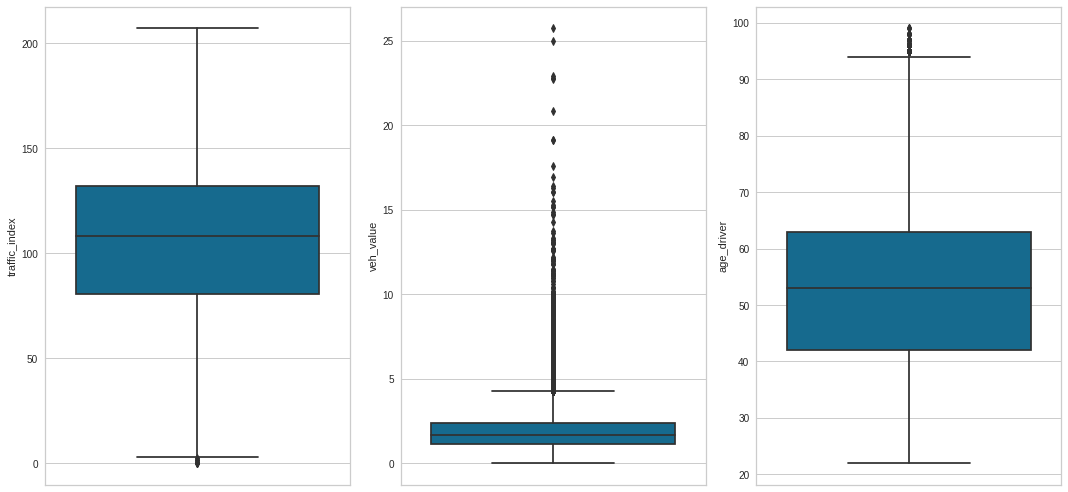

In [ ]:
import seaborn as sns

#Discover outliers

a = ['traffic_index', 'veh_value', 'age_driver']
i = 1
plt.figure(figsize=(15,7))
for b in a:
    plt.subplot(1,3,i)
    sns.boxplot(y = b,data=d_data)
    i+=1
    plt.tight_layout()

<Figure size 1080x504 with 0 Axes>

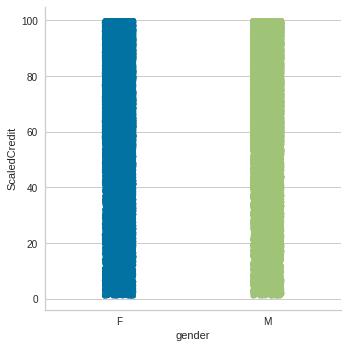

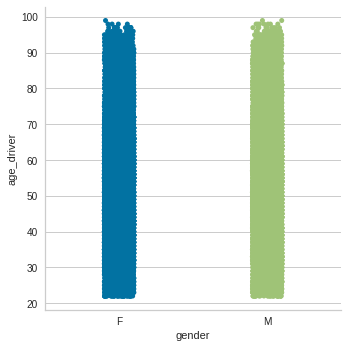

In [ ]:
import seaborn as sns
a = [ 'ScaledCredit', 'age_driver']
i = 1
plt.figure(figsize=(15,7))
for b in a:
    
    sns.catplot(x = 'gender' , y = b ,data=d_data)



<Figure size 7200x7200 with 0 Axes>

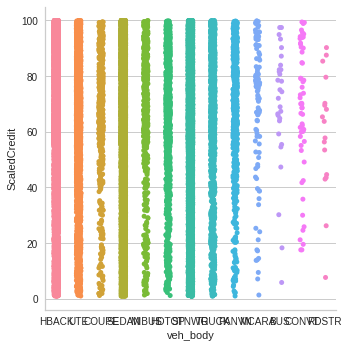

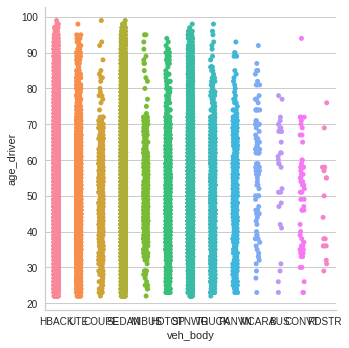

In [ ]:
a = [ 'ScaledCredit', 'age_driver']
i = 1
plt.figure(figsize=(100,100))
for b in a:
    
    sns.catplot(x = 'veh_body' , y = b ,data=d_data)

<Figure size 7200x7200 with 0 Axes>

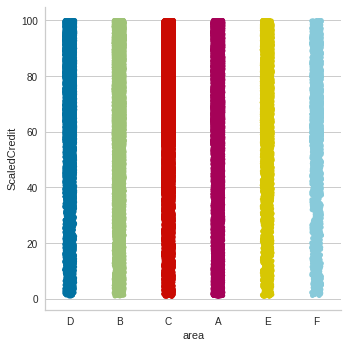

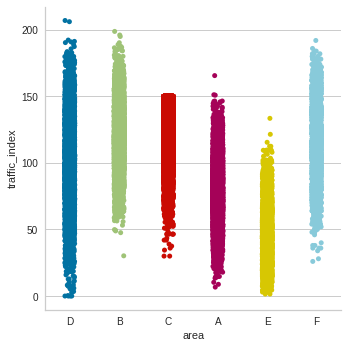

In [ ]:
a = [ 'ScaledCredit', 'traffic_index']
i = 1
plt.figure(figsize=(100,100))
for b in a:
    
    sns.catplot(x = 'area' , y = b ,data=d_data)

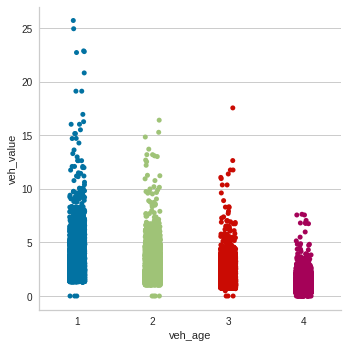

In [ ]:
sns.catplot(x = 'veh_age' , y = 'veh_value' ,data=d_data)

# **Shape of dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


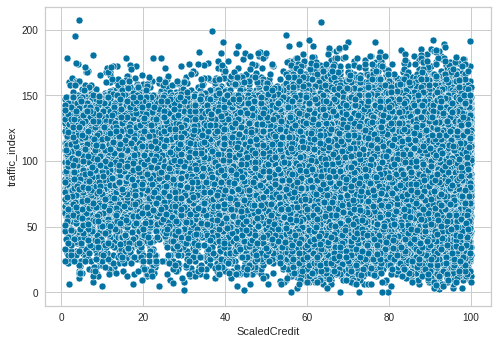

In [ ]:
sns.scatterplot(d_data['ScaledCredit'], d_data['traffic_index'])

# Removing the outliers

In [ ]:

print("Shape of data Before outlier removal is: ", d_data.shape)

def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (  (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]
    return filtered_data

 
data1= removeOutliers(d_data, d_data.columns[6]) #veh_value		
print("Shape of data After outlier removal is: ", data1.shape)

dataset= removeOutliers(data1, data1.columns[8]) #age_driver
print("Shape of data After outlier removal is: ", dataset.shape)



Shape of data Before outlier removal is:  (49919, 9)
Shape of data After outlier removal is:  (46774, 9)
Shape of data After outlier removal is:  (46650, 9)


# **Preprocess data**

Normalize the continuos features to ensure that one feature is not interpreted as being more important than others.

In [ ]:
#Label Encoding the object dtypes.

s = (dataset.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

LE=LabelEncoder()
for i in object_cols:
    dataset[i]=dataset[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

Categorical variables in the dataset: ['gender', 'area', 'veh_body']
All features are now numerical


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
#Scaling
scaler = StandardScaler()
scaler.fit(dataset)
scaled_ds = pd.DataFrame(scaler.transform(dataset),columns= dataset.columns )
print("All features are now scaled")

All features are now scaled


In [ ]:
dataset = dataset.astype(float).round(2)

In [ ]:
dataset

,gender,agecat,area,traffic_index,veh_age,veh_body,veh_value,ScaledCredit,age_driver
0,0.0,4.0,3.0,133.6,2.0,3.0,1.33,15.43,54.0
1,0.0,2.0,3.0,163.6,1.0,12.0,3.74,45.72,39.0
2,1.0,2.0,1.0,117.5,4.0,2.0,0.88,63.75,38.0
3,1.0,4.0,1.0,100.7,3.0,9.0,1.04,80.70,61.0
4,0.0,4.0,2.0,115.5,4.0,3.0,0.47,94.05,54.0
...,...,...,...,...,...,...,...,...,...
60384,1.0,2.0,2.0,144.0,4.0,2.0,1.39,60.33,41.0
60385,0.0,5.0,2.0,141.0,3.0,3.0,1.26,79.98,71.0
60386,0.0,3.0,4.0,34.5,4.0,12.0,2.31,82.87,45.0
60387,0.0,5.0,2.0,145.5,4.0,3.0,0.89,92.61,66.0


Text(0, 0.5, 'Inertia')

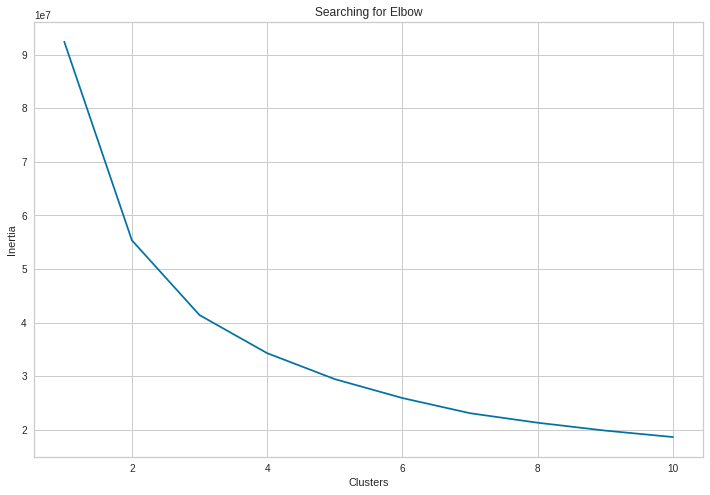

In [ ]:
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(dataset)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


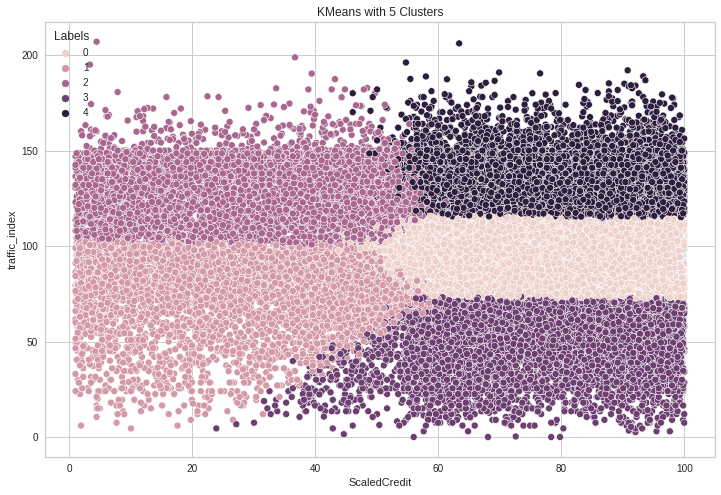

In [ ]:
km = KMeans(n_clusters=5).fit(dataset)

dataset['Labels'] = km.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot( dataset['ScaledCredit'], dataset['traffic_index'], hue=dataset['Labels'], )
plt.title('KMeans with 5 Clusters')
plt.show()

# **credit scores vs traffic_index plot shows the clusters pattern**

1.   group 3: high credit scores & less than the avarge of traffic (Good drivers)

2.   group 0: high credit scores & at the avarge of traffic (Normal drivers)

3.   group 4: high credit scores & high than the avarge of traffic ( Excellent drivers)

4.   group 1: low credit scores & less than the avarge of traffic ( Riskier drivers)

5.   group 2: low credit scores & high than the avarge of traffic  ( Less Riskier drivers)


